In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [35]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
rec_date = dt.date(2017 , 8 ,23)
print(rec_date)

2017-08-23


In [42]:
# Calculate the date one year from the last date in data set.
yr_ago = rec_date - dt.timedelta(days=365)
print(yr_ago)

2016-08-23


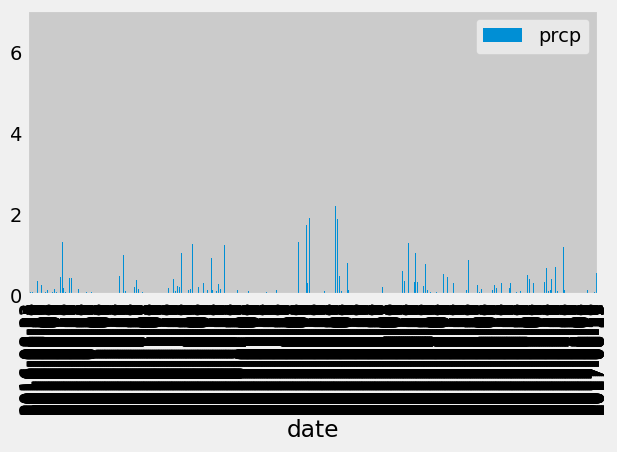

In [43]:
mes =[Measurement.date, Measurement.prcp]
# Perform a query to retrieve the data and precipitation scores
prec = session.query(*mes).\
    filter(Measurement.date >= yr_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec, columns=['date', 'prcp']).sort_values('date', ascending = True)
prec_df.set_index(prec_df["date"], inplace=True)
prec_df = prec_df.dropna()


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(prec_df['prcp'])
df.plot.bar()
plt.tight_layout()
plt.show()



In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df[["prcp"]].describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
joint = [Station.station, Station.id, Measurement.date, Measurement.tobs, Measurement.station]

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()  
active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(71.66378066378067, 54.0, 85.0)]

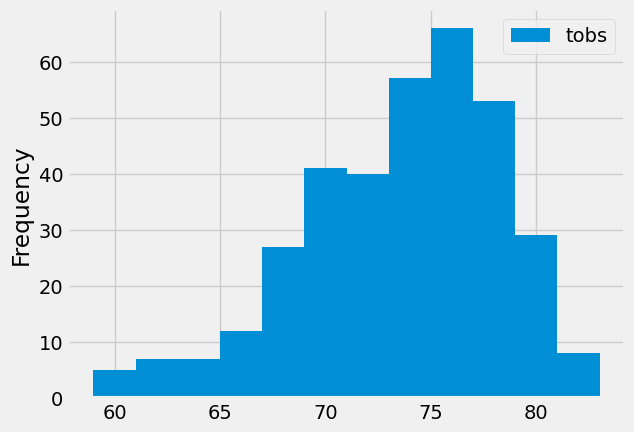

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= yr_ago).all()
active_station_df = pd.DataFrame(active_station, columns = ["tobs"])
active_station_df.plot.hist(bins = 12)
plt.show()

# Close session

In [49]:
# Close Session
session.close()